# İstatistikte Olasılık Dağılımları

## Veri Türleri

### 1-)Kesikli(Discrete) Veri

* Sayılabilen,ayrık değerler alan verilerdir
* Örnek:Öğrenci sayısı,atılan zar sonuçları,doğum sayısı

### 2-)Sürekli(Continuous) Veri

* Belli bir aralıkta sonsuz deper alabilen verilerdir
* Örnek:Boy,kilo,sıcaklık,zaman

# Kesikli(Discrete) Dağılımlar

## 1-) Binominal Dağılım(Binomial Distribution)

* Sabit sayıda bağımsız "başarı/başarısızlık" denemeleri için kullanılır(Bernoulli denemeleri)
* İki parametresi vardır: n--> deneme sayısı  ve p-->başarı olasılığı

### Matematiksel Formülü

$$
P(X = k) = C(n, k) \times p^k \times (1-p)^{n-k}
$$

* Beklenen Değer(Ortalama):E(X)= n*p
* Varyans:Var(X)=n * p *(1-p)

 Gerçek hayat örneği--> bir şirkette 10 kullanıcıya yeni bir ürün test ettirildiğinde ürüne beğeneceğini modellemek için kullanılabilir




In [1]:
import matplotlib.pyplot as plt 
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.size"] = 12
sns.set_palette("Set2")

Binomial Dağılım Örneği
--------------------------------------------------
Binomial dağılım: n=10 , p=0.4
Beklenen değer (ortalama): 4.0
Varyans: 2.3999999999999995
Standart sapma: 1.5491933384829666
--------------------------------------------------
En az 6 kişinin ürünü beğenme olasılığı 0.16623861760000003 (%16.62)
--------------------------------------------------
6 kişinin ürünü beğenme olasılığı 0.11147673600000013 (%11.15)


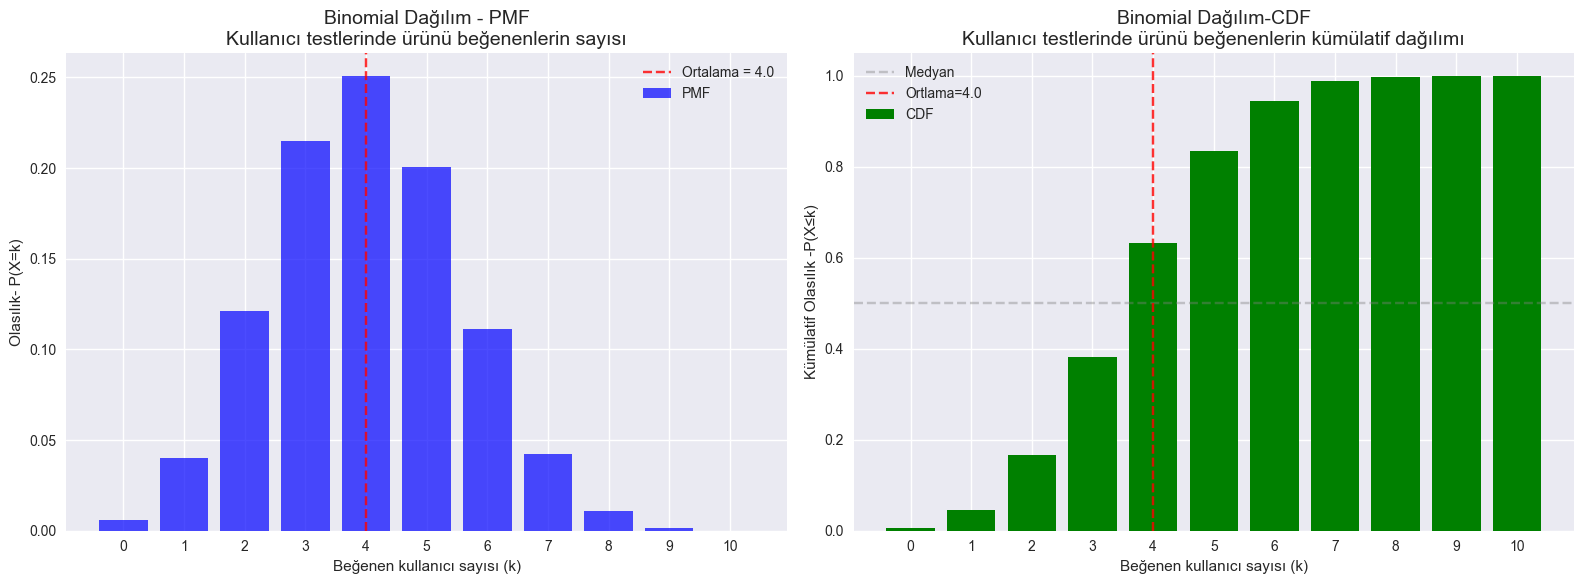

In [2]:
print("Binomial Dağılım Örneği")
print("-"*50)

#Parametre tanımlamaları
n_denemeler=10 #Deneme sayısı
p_basari=0.4 #Başarı olasılığı

#Örnek-->Bir şirkette yeni geliştirilen ürün için kullanıcı testleri yapılsın
#n_denemeler = 10 kullanıcıya test yapılıyor
#p_basari = 0.4 bir kullanıcının ürünü beğenme olasılığı

#x değerleri oluştur (0 dan n'e kadar)
x_values=np.arange(0,n_denemeler +1)

#Binom PMF (Olasılık Kütle Fonksiyonu) hesapla
binom_pmf=stats.binom.pmf(x_values,n_denemeler,p_basari)
binom_rv=stats.binom(n_denemeler,p_basari) #teorik dağılım üretir

#Binom CDF (Kümülatif Dağılım Fonksiyonu) hesapla
binom_cdf=stats.binom.cdf(x_values,n_denemeler,p_basari)

#Beklenen değer ve varyans
mean_binom=binom_rv.mean()
var_binom=binom_rv.var()

print(f"Binomial dağılım: n={n_denemeler} , p={p_basari}")
print(f"Beklenen değer (ortalama): {mean_binom}")
print(f"Varyans: {var_binom}")
print(f"Standart sapma: {np.sqrt(var_binom)}")

#En az 6 kişinin ürünü beğenme olasılığı
print("-"*50)
prob_at_least_6= 1-binom_cdf[5]
print(f"En az 6 kişinin ürünü beğenme olasılığı {prob_at_least_6} (%{prob_at_least_6*100:.2f})")

#6 kişinin ürünü beğenme olasılığı
print("-"*50)
prob_6= binom_pmf[6]
print(f"6 kişinin ürünü beğenme olasılığı {prob_6} (%{prob_6*100:.2f})")

#Görselleştirme#
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
#PMF grafiği
ax1.bar(x_values,binom_pmf,alpha=0.7,color="blue",label="PMF")
ax1.axvline(mean_binom,color="red",linestyle="--",alpha=0.8,label=f"Ortalama = {mean_binom}")
ax1.set_title("Binomial Dağılım - PMF\nKullanıcı testlerinde ürünü beğenenlerin sayısı",fontsize=14)
ax1.set_xlabel("Beğenen kullanıcı sayısı (k)")
ax1.set_ylabel("Olasılık- P(X=k)")
ax1.set_xticks(x_values)
ax1.legend()

#CDF grafiği
ax2.bar(x_values,binom_cdf,color="green",label="CDF")
ax2.axhline(0.5,color="grey",linestyle="--",alpha=0.4,label="Medyan")
ax2.axvline(mean_binom,color="red",linestyle="--",alpha=0.8,label=f"Ortlama={mean_binom}")
ax2.set_title("Binomial Dağılım-CDF\nKullanıcı testlerinde ürünü beğenenlerin kümülatif dağılımı",fontsize=14)
ax2.set_xlabel("Beğenen kullanıcı sayısı (k)")
ax2.set_ylabel("Kümülatif Olasılık -P(X≤k)")
ax2.set_xticks(x_values)
ax2.legend()
plt.tight_layout()
plt.show()


## 2-)Poisson Dağılımı(Poisson Distribution)

* Belirli bir zaman aralığında,mekanda veya hacimde meydana gelen bağımsız olayların sayısını modellemek için kullanılır
* Tek parametresi vardır:λ (lambda)--> Belirli bir zaman/mekan birimde beklenen olay sayısı
* Sadece kesikli değerler alır(0,2,3..)
* Sorularda olayın gerçekleşme ortalaması verilir

### Matematiksel Formulü
$$
P(X = k) = \frac{e^{-\lambda} \times \lambda^k}{k!}
$$

* Beklenen Değer(ortalama): E(X)=λ
* Varyans:Var(X)=λ

Gerçek hayat örneği-->Bir çağrı merkezine saatte gelen çağrı sayısı,bir web sitesine dakikada gelen ziyaretçi sayısı

Poisson Dağılımı Örneği
--------------------------------------------------
Poisson Dağılımı: λ=5
Beklenen Değer(ortalama): 5.0
Varyans: 5.0
Standart Sapma: 2.23606797749979
Bir saatte en fazla 3 çağrı gelme olasılığı: 0.2650259152973616 (%26.50)
Bir saatte en az 8 çağrı gelme olasılığı: 0.1333716740700075 (%13.34)


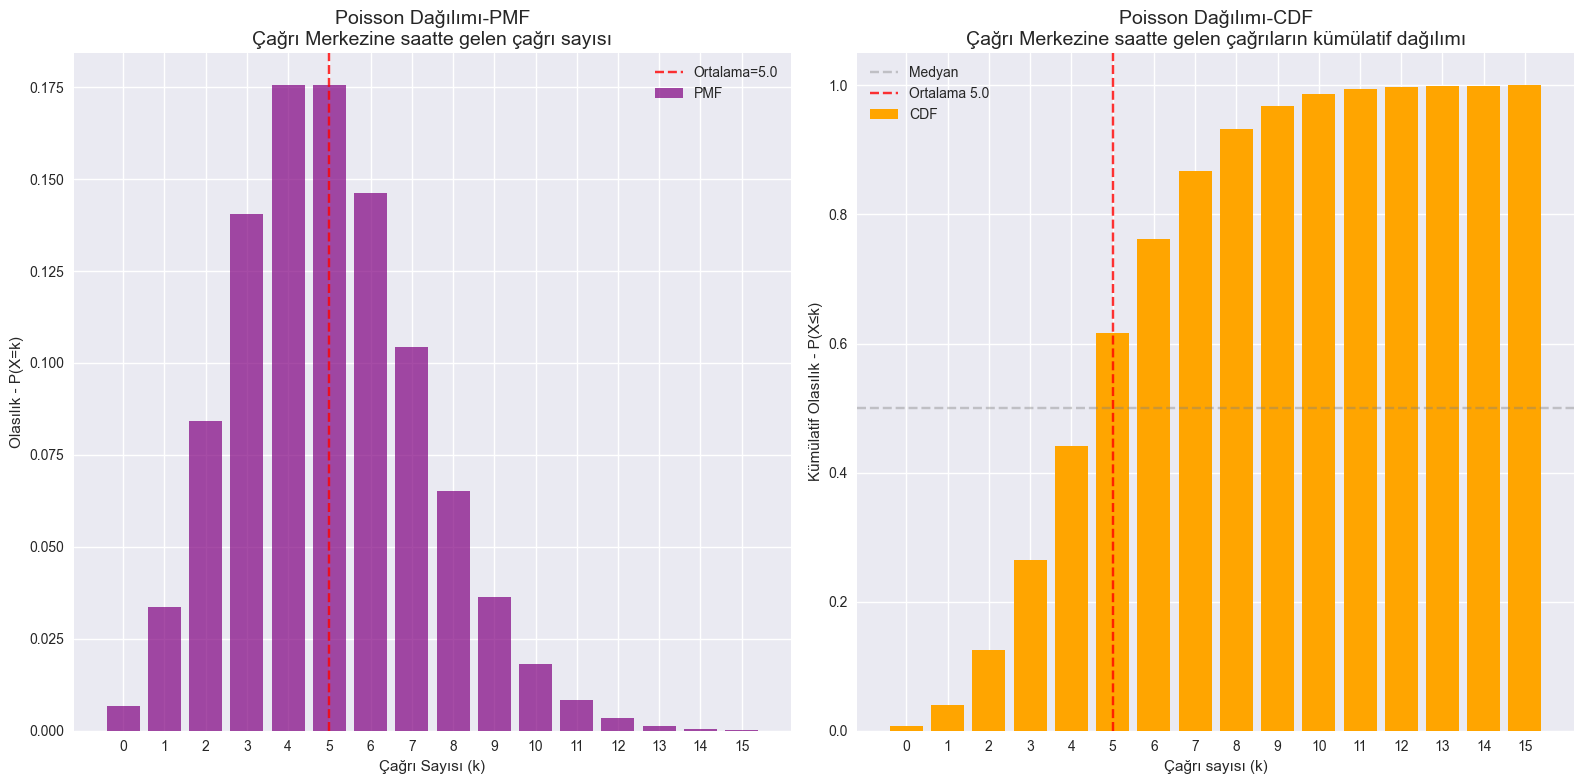

In [3]:
print("Poisson Dağılımı Örneği")
print("-"*50)

#Lambda parametresi (ortalama olay sayısı)
lambda_param=5 #saatte ortalama çağrı

#Örnek: Bİr çağrı merkezine saatte ortalama 5 çağrı geliyor

#x değerleri oluştur(0 dan bir üst limite kadar)
max_x=15
x_values=np.arange(0,max_x+1)

#Poisson PMF hesapla
poisson_pmf=stats.poisson.pmf(x_values,lambda_param)
poisson_rv=stats.poisson(lambda_param)

#Poisson CDF hesapla
poisson_cdf=stats.poisson.cdf(x_values,lambda_param)

#Beklenen değer ve varyans
mean_poission=poisson_rv.mean()
var_poisson=poisson_rv.var()

print(f"Poisson Dağılımı: λ={lambda_param}")
print(f"Beklenen Değer(ortalama): {mean_poission}")
print(f"Varyans: {var_poisson}")
print(f"Standart Sapma: {np.sqrt(var_poisson)}")

#Bİr saatte en fazla 3 çağrı gelme olasılığı
prob_at_most_3=poisson_cdf[3]
print(f"Bir saatte en fazla 3 çağrı gelme olasılığı: {prob_at_most_3} (%{prob_at_most_3*100:.2f})")

#Bir saatte en az 8 çağrı gelme olasılığı
prob_at_least_8=1-poisson_cdf[7]
print(f"Bir saatte en az 8 çağrı gelme olasılığı: {prob_at_least_8} (%{prob_at_least_8*100:.2f})")

#Görselleştirme
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,8))

#PMF Grafiği
ax1.bar(x_values,poisson_pmf,alpha=0.7,color="purple",label="PMF")
ax1.axvline(mean_poission,color="red",linestyle="--",alpha=0.8,label=f"Ortalama={mean_poission}")
ax1.set_title("Poisson Dağılımı-PMF\nÇağrı Merkezine saatte gelen çağrı sayısı",fontsize=14)
ax1.set_xlabel("Çağrı Sayısı (k)")
ax1.set_ylabel("Olasılık - P(X=k)")
ax1.set_xticks(x_values)
ax1.legend()

#CDF Grafiği
ax2.bar(x_values,poisson_cdf,color="orange",label="CDF")
ax2.axhline(0.5,color="grey",linestyle="--",alpha=0.4,label="Medyan")
ax2.axvline(mean_poission,color="red",linestyle="--",alpha=0.8,label=f"Ortalama {mean_poission}")
ax2.set_title("Poisson Dağılımı-CDF\nÇağrı Merkezine saatte gelen çağrıların kümülatif dağılımı",fontsize=14)
ax2.set_xlabel("Çağrı sayısı (k)")
ax2.set_ylabel("Kümülatif Olasılık - P(X≤k)")
ax2.set_xticks(x_values)
ax2.legend()
plt.tight_layout()
plt.show()

# Sürekli (Continuous) Dağılımlar

## Normal Dağılım(Normal/Gaussian Distrubition)

* Çan eğrisi şeklinde simetrik bir dağılımdır
* İki parametresi vardır: μ(mu,ortalama) ve σ(sigma,standart sapma)
* Doğadaki bir çok olay normal dağılıma yaklaşır

### Matematiksel Formul:
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \times e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

* Beklenen Değer(Ortalama):E(X) = μ
* Varyans:Var(X) = σ²

Gerçek hayat örneği olarak insan boyları,üretim hataları,test sonuçları


Normal Dağılım
--------------------------------------------------
Normal dağılım: μ=170, σ=7
Beklenen değer (ortalama): 170.0
Varyans: 49.0
Standart sapma: 7.0
175 cm'den uzun olma olasılığı: 0.2375 (%23.75)
160 cm ile 180 cm arasında olma olasılığı: 0.8468725489803306 (%84.69)


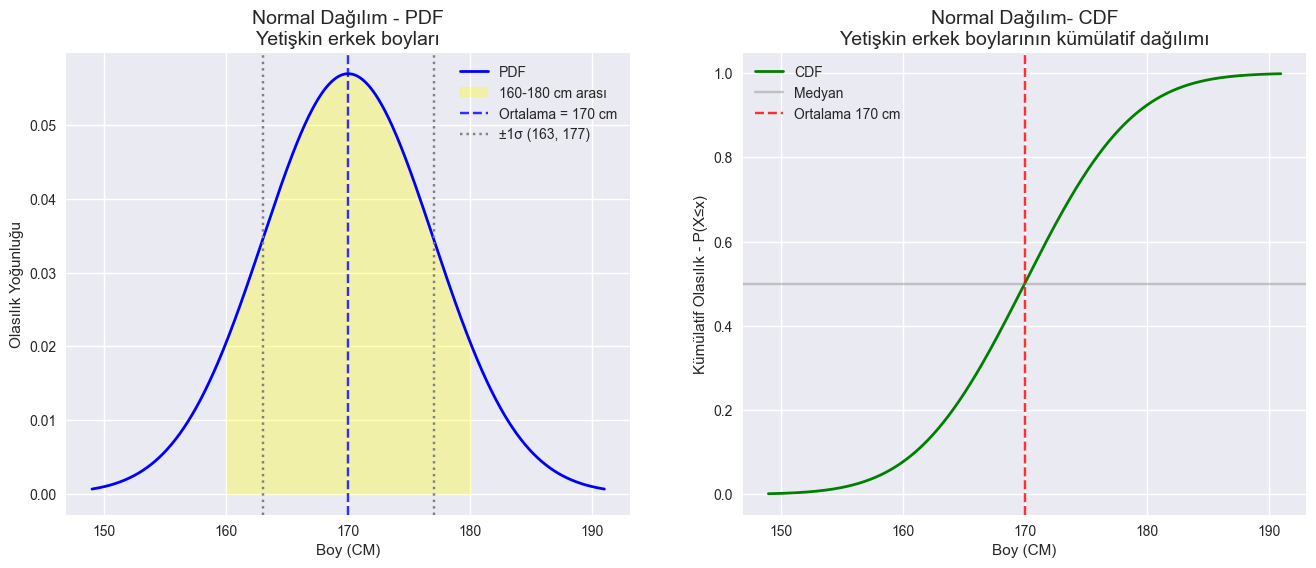

In [4]:
print("Normal Dağılım")
print("-"*50)

#Örnek: Yetişkin erkeklerin boyları normal dağılımıa uyar
# mu=170 cm ortalama boy
# sigma=7 cm standart sapma

#parametre tanımlamaları
mu=170 #Ortalama(cm cinsinden boy)
sigma=7 #Standart sapma

#x değerleri oluştur (mu-3*sigma'dan mu+3*sigma'ya kadar)
x_normal=np.linspace(mu - 3*sigma, mu + 3*sigma,1000)

#Normal PDF(olasılık yoğunluk fonksiyonu) hesapla
normal_pdf=stats.norm.pdf(x_normal,mu,sigma)
normal_rv=stats.norm(mu,sigma)

#Normal CDF hesapla
normal_cdf=stats.norm.cdf(x_normal,mu,sigma)

#Beklenen değer ve varyans
mean_normal=normal_rv.mean()
var_normal=normal_rv.var()

print(f"Normal dağılım: μ={mu}, σ={sigma}")
print(f"Beklenen değer (ortalama): {mean_normal}")
print(f"Varyans: {var_normal}")
print(f"Standart sapma: {np.sqrt(var_normal)}")

#175 cm'den uzun olma olasılığı
prob_taller_than_175 = 1 - stats.norm.cdf(175,mu,sigma)
print(f"175 cm'den uzun olma olasılığı: {prob_taller_than_175:.4f} (%{prob_taller_than_175*100:.2f})")

#160cm ila 180 cm arasında olma olasılığı
prob_between_160_180=stats.norm.cdf(180,mu,sigma) - stats.norm.cdf(160,mu,sigma)
print(f"160 cm ile 180 cm arasında olma olasılığı: {prob_between_160_180} (%{prob_between_160_180*100:.2f})")

#Görselleştirme
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

#PDF grafiği
ax1.plot(x_normal,normal_pdf,"b-",lw=2,label="PDF")
ax1.fill_between(x_normal,normal_pdf,where=(x_normal>=160) & (x_normal<=180),color="yellow",alpha=0.3,label="160-180 cm arası")
ax1.axvline(mu,color="blue",linestyle="--",alpha=0.8,label=f"Ortalama = {mu} cm")
ax1.axvline(mu-sigma,color="grey",linestyle=":",label=f"±1σ ({mu-sigma}, {mu+sigma})")
ax1.axvline(mu+sigma,color="grey",linestyle=":")
ax1.set_title("Normal Dağılım - PDF\nYetişkin erkek boyları",fontsize=14)
ax1.set_xlabel("Boy (CM)")
ax1.set_ylabel("Olasılık Yoğunluğu")
ax1.legend()

#CDF Grafiği
ax2.plot(x_normal,normal_cdf,"g-",lw=2,label="CDF")
ax2.axhline(0.5,color="grey",alpha=0.4,label="Medyan")
ax2.axvline(mu,color="red",linestyle="--",alpha=0.8,label=f"Ortalama {mu} cm")
ax2.set_title("Normal Dağılım- CDF\nYetişkin erkek boylarının kümülatif dağılımı",fontsize=14)
ax2.set_xlabel("Boy (CM)")
ax2.set_ylabel("Kümülatif Olasılık - P(X≤x)")
ax2.legend()
plt.tight_layout
plt.show()

## Üssel Dağılım

* Poisson sürecinde iki ardışık olay arasındaki süreyi modellemek için kullanılır
* Tek parametresi vardır: λ(lambda), birim zamanda beklenen olay sayısı
* Hafızasız özelliğe sahiptir:Geçmiş bekleme süresi gelecekteki bekleme süresini etkilemez

### Matematiksel Formülü

  $$
  f(x) = \lambda e^{-\lambda x},\ x \geq 0
  $$

* Beklenen Değer(Ortalama):E(X)=1/λ
* Varyans:Var(X)=1/λ²

Gerçek hayat örneği-->Bir ATM ye gelen müşteriler arasındali süre,arızalanma süreleri,radyoaktif parçacık emisyonları arasındaki süre
  


Üssel Dağılım Örneği
--------------------------------------------------
Üssel Dağılım: λ=0.5 (ortalama=2.0 dakika)
Beklenen değer (ortalama): 2.0 dakika
Varyans: 4.0
Standart Sapma: 2.0 dakika
Bir sonraki müşterinin 3 dakikadan fazla süre sonra gelme olasılığı 0.2231301601484298 (%22.31)
Bir sonraki müşterinin 1 ile 4 dakika arasında gelme olasılığı: 0.4711953764760207 (%47.12)


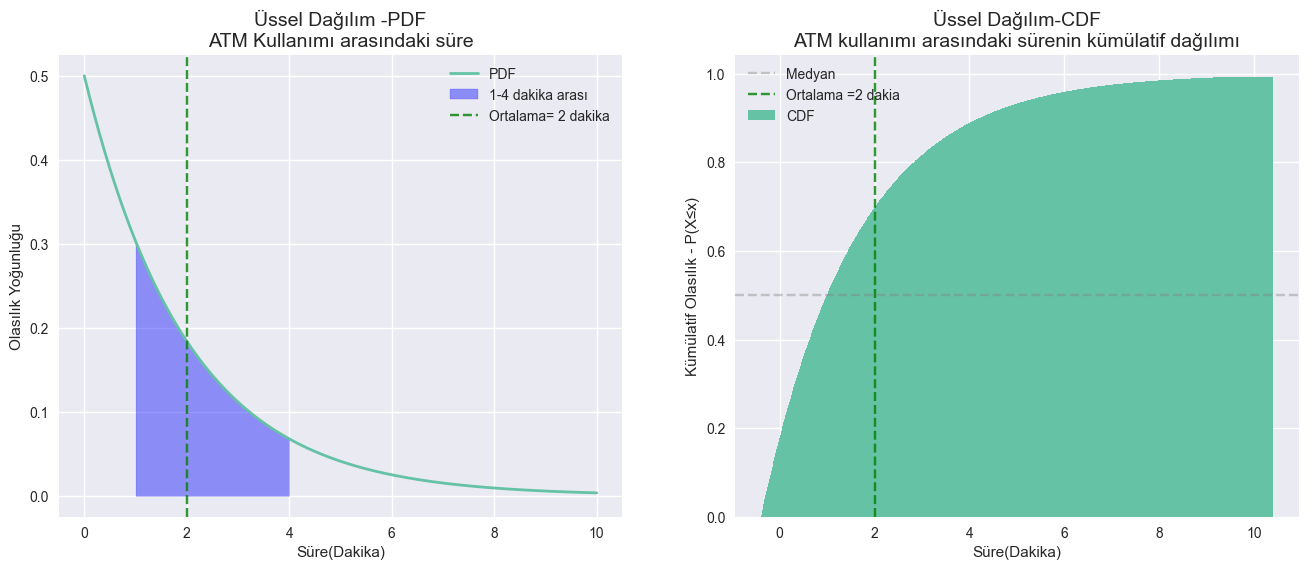

In [5]:
print("Üssel Dağılım Örneği")
print("-"*50)

#Örnek: Bir ATM'yi kullanan müşteriler arasındaki süre üssel dağılıma uyar
#lam = 0.5 (bir müşterinin gelmesi için ortalama bekleme süresi 2 dakika)

#Parametre tanımlamaları
lam=0.5  #Lambda parametresi (ortalama: 1/lambda=2 dakika)

#x değerleri oluştur
x_exp=np.linspace(0,10,1000) #0 dan 10 dakikaya kadar

#Üssel PDF (olasılık yoğunluk fonksiyonu) hesapla
exp_pdf=stats.expon.pdf(x_exp,scale=1/lam) #scale=1/lambda
exp_rv=stats.expon(scale=1/lam)

#Üssel CDF hesapla
exp_cdf=stats.expon.cdf(x_exp,scale=1/lam)

#Beklenen değer ve varyans
mean_exp=exp_rv.mean()
var_exp=exp_rv.var()

print(f"Üssel Dağılım: λ={lam} (ortalama={1/lam} dakika)")
print(f"Beklenen değer (ortalama): {mean_exp} dakika")
print(f"Varyans: {var_exp}")
print(f"Standart Sapma: {np.sqrt(var_exp)} dakika")

#Bir sonraki müşterinin 3 dakikadan uzun süre sonra gelme olasılığı
prob_wait_more_3=1 - stats.expon.cdf(3,scale=1/lam)
print(f"Bir sonraki müşterinin 3 dakikadan fazla süre sonra gelme olasılığı {prob_wait_more_3} (%{prob_wait_more_3*100:.2f})")

#Bir sonraki müşterinin 1 ila 3 dakika arasında gelme olasılığı
prob_between_1_4=stats.expon.cdf(4,scale=1/lam) - stats.expon.cdf(1,scale=1/lam)
print(f"Bir sonraki müşterinin 1 ile 4 dakika arasında gelme olasılığı: {prob_between_1_4} (%{prob_between_1_4*100:.2f})")

#Görselleştirme
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))

#PDF Grafiği
ax1.plot(x_exp,exp_pdf,lw=2,label="PDF")
ax1.fill_between(x_exp,exp_pdf,where=(x_exp>=1)&(x_exp<4),color="blue",alpha=0.4,label="1-4 dakika arası")
ax1.axvline(mean_exp,color="green",linestyle="--",alpha=0.8,label=f"Ortalama= {mean_exp:.0f} dakika")
ax1.set_title("Üssel Dağılım -PDF\nATM Kullanımı arasındaki süre",fontsize=14)
ax1.set_xlabel("Süre(Dakika)")
ax1.set_ylabel("Olasılık Yoğunluğu")
ax1.legend()

#CDF Grafiği
ax2.bar(x_exp,exp_cdf,lw=2,label="CDF")
ax2.axhline(0.5,color="grey",linestyle="--",alpha=0.4,label="Medyan")
ax2.axvline(mean_exp,color="green",linestyle="--",alpha=0.8,label=f"Ortalama ={mean_exp:.0f} dakia")
ax2.set_title("Üssel Dağılım-CDF\nATM kullanımı arasındaki sürenin kümülatif dağılımı",fontsize=14)
ax2.set_xlabel("Süre(Dakika)")
ax2.set_ylabel("Kümülatif Olasılık - P(X≤x)")
ax2.legend()
plt.show()





# -----GERÇEK HAYATTA UYGUN KAPSAMLI ÖRNEK-----

### E-Ticaret Sitesi için müşteri davranışları simülasyonu

In [6]:
np.random.seed(31)
#Parametreler
num_customers=1000
conversion_rate=0.4 #siteye girenlerin yüzde 40 ı alışveriş yapıyor
avg_session_time=15 #dakika cinsinden ortalama site ziyareti süresi
avg_orders_per_month=2 #Müşterinin ayda ortalama sipariş sayısı

print("E-ticaret sitesi müşteri davranışları analizi")
print(f"Toplam müşteri sayısı: {num_customers}")
print(f"Alışveriş yapma oranı: %{conversion_rate*100}")
print(f"Ortalama ziyaret süresi: {avg_session_time} dakika")
print(f"Müşteri başına aylık ortalama sipariş sayısı: {avg_orders_per_month}")
print("-"*60)

#Binomial Dağılım -Alışveriş yapan müşteri sayısı
customers_shop=np.random.binomial(n=1,p=conversion_rate,size=num_customers)
num_buyers=np.sum(customers_shop) #1000 kişiden alışveriş yapan kişi sayısı
print(f"Alışveriş yapan müşteri sayısı: {num_buyers} (Yüzde {num_buyers/num_customers*100:.2f})")

#Normal Dağılım -Sitede geçirilen süre (dakika)
session_times=np.random.normal(avg_session_time,5,num_customers)
session_times=np.clip(session_times,0,None) # - süre olamaz

#Possion Dağılım -Müşteri başına aylık sipariş sayısı
monthly_orders=np.random.poisson(avg_orders_per_month,num_customers)

#Üssel Dağılım -İki sipariş arasındaki gün sayısı
time_between_orders=np.random.exponential(30/avg_orders_per_month,num_customers)

#Data Frame oluştur
customer_df=pd.DataFrame({"MüşteriID":range(1,num_customers+1),
                          "AlışverişYaptı":customers_shop,
                          "ZiyaretSüresi(Dk)":session_times,
                          "AylıkSiparişSayısı":monthly_orders,
                          "SiparişlerArasıGünFarkı":time_between_orders})

customer_df["ZiyaretSüresi(Dk)"]=customer_df["ZiyaretSüresi(Dk)"].astype("int")
customer_df["SiparişlerArasıGünFarkı"]=customer_df["SiparişlerArasıGünFarkı"].astype("int")



E-ticaret sitesi müşteri davranışları analizi
Toplam müşteri sayısı: 1000
Alışveriş yapma oranı: %40.0
Ortalama ziyaret süresi: 15 dakika
Müşteri başına aylık ortalama sipariş sayısı: 2
------------------------------------------------------------
Alışveriş yapan müşteri sayısı: 396 (Yüzde 39.60)


In [7]:
customer_df

,MüşteriID,AlışverişYaptı,ZiyaretSüresi(Dk),AylıkSiparişSayısı,SiparişlerArasıGünFarkı
0,1,0,22,2,5
1,2,1,18,3,20
2,3,1,13,2,8
3,4,1,7,1,12
4,5,0,16,2,43
...,...,...,...,...,...
995,996,1,13,1,12
996,997,1,23,2,10
997,998,0,17,3,21
998,999,0,22,0,8


In [8]:
#İstatiksel Özet
print("Ziyaret Süreleri İstatistikleri")
print(f"Ortalama {customer_df["ZiyaretSüresi(Dk)"].mean():.2f} Dakika")
print(f"Medyan: {customer_df['ZiyaretSüresi(Dk)'].median():.2f} dakika")
print(f"Standart Sapma: {customer_df['ZiyaretSüresi(Dk)'].std():.2f} dakika")
print(f"Min: {customer_df['ZiyaretSüresi(Dk)'].min():.2f} dakika")
print(f"Max: {customer_df['ZiyaretSüresi(Dk)'].max():.2f} dakika")

print("\nAylık Sipariş Sayısı İstatistikleri:")
print(f"Ortalama: {customer_df['AylıkSiparişSayısı'].mean():.2f}")
print(f"Medyan: {customer_df['AylıkSiparişSayısı'].median():.2f}")
print(f"Standart Sapma: {customer_df['AylıkSiparişSayısı'].std():.2f}")
print(f"Max: {customer_df['AylıkSiparişSayısı'].max()}")

print("\nSiparişler Arası Gün Sayısı İstatistikleri:")
print(f"Ortalama: {customer_df['SiparişlerArasıGünFarkı'].mean():.2f} gün")
print(f"Medyan: {customer_df['SiparişlerArasıGünFarkı'].median():.2f} gün")
print(f"Standart Sapma: {customer_df['SiparişlerArasıGünFarkı'].std():.2f} gün")


Ziyaret Süreleri İstatistikleri
Ortalama 14.90 Dakika
Medyan: 15.00 dakika
Standart Sapma: 4.97 dakika
Min: 0.00 dakika
Max: 29.00 dakika

Aylık Sipariş Sayısı İstatistikleri:
Ortalama: 2.04
Medyan: 2.00
Standart Sapma: 1.44
Max: 7

Siparişler Arası Gün Sayısı İstatistikleri:
Ortalama: 14.33 gün
Medyan: 11.00 gün
Standart Sapma: 13.96 gün


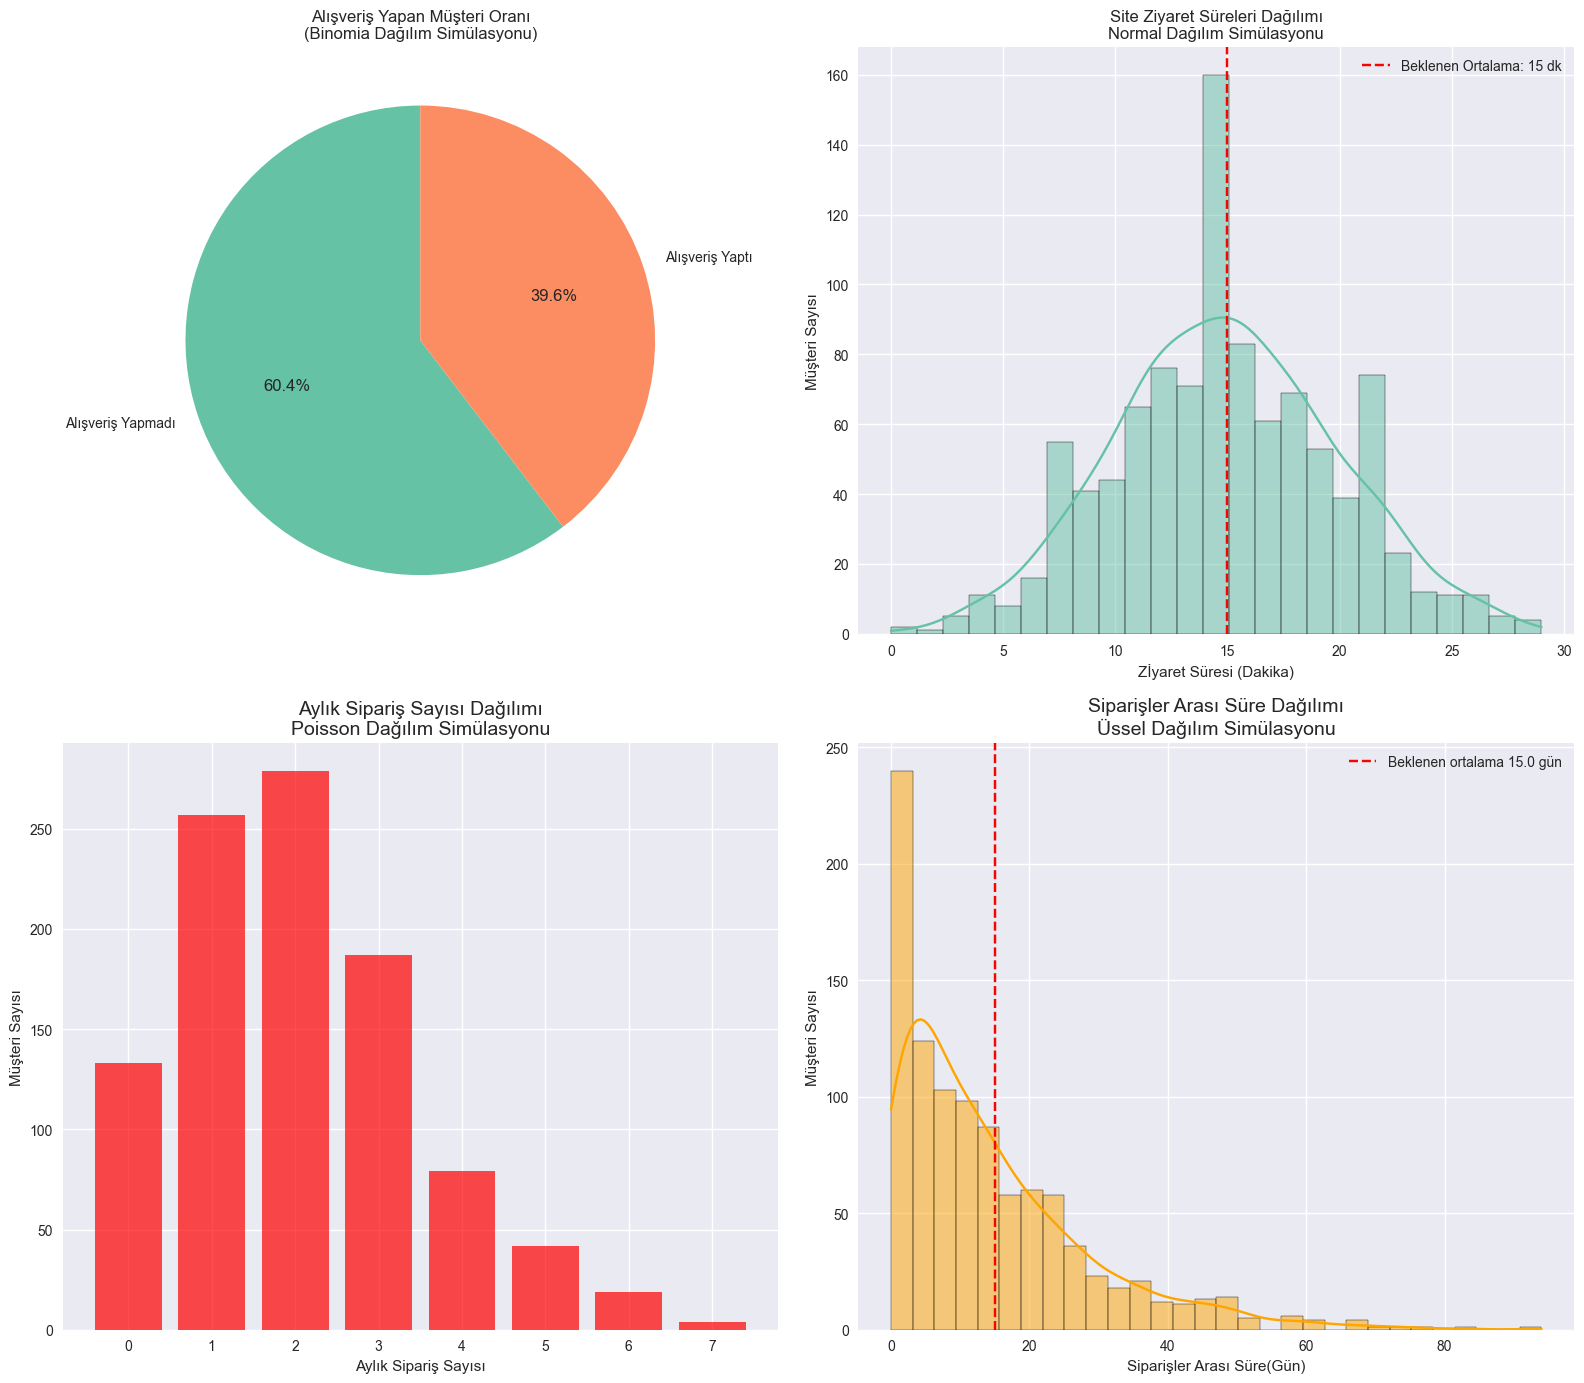

In [9]:
#Görselleştirmeler
fig,axs=plt.subplots(2,2,figsize=(16,14))

# 1-)Binomial -Alışveriş yapanlar/yapmayanlar
labels=["Alışveriş Yapmadı","Alışveriş Yaptı"]
sizes=[(num_customers-num_buyers),num_buyers]
axs[0,0].pie(sizes,labels=labels,autopct="%1.1f%%",startangle=90)
axs[0,0].set_title("Alışveriş Yapan Müşteri Oranı\n(Binomia Dağılım Simülasyonu)")

# 2-)Normal -Ziyaret Süreleri Histogramı
sns.histplot(customer_df["ZiyaretSüresi(Dk)"],kde=True,ax=axs[0,1])
axs[0,1].axvline(avg_session_time,color="red",linestyle="--",label=f"Beklenen Ortalama: {avg_session_time} dk")
axs[0,1].set_title("Site Ziyaret Süreleri Dağılımı\nNormal Dağılım Simülasyonu")
axs[0,1].set_xlabel("Zİyaret Süresi (Dakika)")
axs[0,1].set_ylabel("Müşteri Sayısı")
axs[0,1].legend()

# 3-)Poisson -Aylık sipariş sayısı
value_counts=customer_df["AylıkSiparişSayısı"].value_counts().sort_index()
axs[1,0].bar(value_counts.index,value_counts.values,color="red",alpha=0.7)
axs[1,0].set_title("Aylık Sipariş Sayısı Dağılımı\nPoisson Dağılım Simülasyonu",fontsize=14)
axs[1,0].set_xlabel("Aylık Sipariş Sayısı")
axs[1,0].set_ylabel("Müşteri Sayısı")

#4-) Üssel -İki sipariş arasındaki gün sayısı
sns.histplot(customer_df["SiparişlerArasıGünFarkı"],kde="True",ax=axs[1,1],color="orange",bins=30) 
axs[1,1].axvline(30/avg_orders_per_month,color="red",linestyle="--",label=f"Beklenen ortalama {30/avg_orders_per_month:.1f} gün")
axs[1,1].set_title("Siparişler Arası Süre Dağılımı\nÜssel Dağılım Simülasyonu",fontsize=14)
axs[1,1].set_xlabel("Siparişler Arası Süre(Gün)")
axs[1,1].set_ylabel("Müşteri Sayısı")
axs[1,1].legend()
plt.tight_layout()
plt.show()

### Sonuç Analizi

In [10]:
high_value_customers=customer_df[(customer_df["AlışverişYaptı"]==1) & (customer_df["AylıkSiparişSayısı"]>=3) ]
print(f"Yüksek değerli müşteri sayısı (ayda 3'den fazla sipariş veren): {len(high_value_customers)}")
print(f"Bu müşteriler toplam müşterilerin %{len(high_value_customers)/num_customers*100:.2f} ünü oluşturur")

Yüksek değerli müşteri sayısı (ayda 3'den fazla sipariş veren): 130
Bu müşteriler toplam müşterilerin %13.00 ünü oluşturur


In [15]:
# 20 dakikadan fazla ziyaret eden ve alışveriş yapan müşterilerin oranı
engaged_buyers=customer_df[(customer_df["ZiyaretSüresi(Dk)"]>20) & (customer_df["AlışverişYaptı"]==1)]
print(f"20 dakikadan fazla sitede olup alışveren yapan müşteri sayısı {len(engaged_buyers)}")
print(f"20 dakikadan fazla sitede olup alışveriş yapanların 20 dkdan fazla ziyaret edenlere  oranı: %{len(engaged_buyers)/len(customer_df[customer_df["ZiyaretSüresi(Dk)"]>20])*100:.2f}")

20 dakikadan fazla sitede olup alışveren yapan müşteri sayısı 46
20 dakikadan fazla sitede olup alışveriş yapanların 20 dkdan fazla ziyaret edenlere  oranı: %32.86


In [18]:
#Sık sipariş veren müşterilerin(3 veya daha faza) ortalama ziyaret süresi
freq_buyers=customer_df[customer_df["AylıkSiparişSayısı"]>=3]
print(f"Sık sipariş veren müşterilerin ortalama ziyaret süresi: {freq_buyers["ZiyaretSüresi(Dk)"].mean():.2f} dakika")

Sık sipariş veren müşterilerin ortalama ziyaret süresi: 15.07 dakika
